# Preprocessing

In [12]:
# Needed libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [13]:
# Importing both csv and joining
df1 = pd.read_csv("Data/public-annotations.csv")
df2 = pd.read_csv("Data/public_cohen_dataset_features.csv")
df = df1.join(df2)

# Dropping J- measurements for "junior"
df = df.drop(['S-A', 'S-B', 'S-C', 'S-D', 'S-E', 'S-F', 'J-A', 'J-B', 'J-C', 'J-D', 'J-E', 'J-F', 'J-Global'], axis = 1)

# Adding severity class 1, 2, 3
df['s_class'] = 0

for i in range(192):
    if df.iloc[i, 1] <= 6:
        df.iloc[i, 109] = 1
        continue
    elif df.iloc[i, 1] <= 12:
        df.iloc[i, 109] = 2
        continue
    else:
        df.iloc[i, 109] = 3
        
        
# dropping filename column and S-Global score
df_features = df.drop('filename', axis = 1)
df_features = df_features.drop('S-Global', axis = 1)


In [14]:
# Setting features and response
X = df_features.iloc[:, 0:107]
Y = df_features.iloc[:, 107:108]

# Splitting 80/20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

# Scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
y_train = np.ravel(y_train)

Logistic Regression - Lasso Feature Selection

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'l1', max_iter = 300, random_state=0,  solver='liblinear').fit(X_scaled, y_train)

In [16]:
clf.predict(X_scaled[:2, :])

array([1, 2])

In [17]:
clf.score(X_scaled, y_train)

# Get confusion matrix

0.7647058823529411

In [18]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression(penalty = 'l1', max_iter = 300, random_state=0,  solver='liblinear').fit(X_scaled, y_train)

# evaluate model
scores = cross_val_score(model, X_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.536 (0.122)


Feature Selection - ANOVA

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Ridge regression 55 features

In [20]:
fs = SelectKBest(score_func = f_classif, k = 55)
X_train_selected_ANOVA = fs.fit_transform(X_scaled, y_train)
# Retrying Log Regression with ANOVA selected features
clf = LogisticRegression(penalty = 'l2', max_iter = 150, random_state=0).fit(X_train_selected_ANOVA, y_train)
clf.score(X_train_selected_ANOVA, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.7908496732026143

In [21]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression(penalty = 'l2', max_iter = 150, random_state=0).fit(X_train_selected_ANOVA, y_train)

# evaluate model
scores = cross_val_score(model, X_train_selected_ANOVA, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.541 (0.153)


In [22]:
y_pred = clf.predict(X_train_selected_ANOVA)

confusion_matrix(y_train, y_pred)

array([[41, 15,  2],
       [ 7, 61,  2],
       [ 0,  6, 19]])

Ridge Regression 19 features (rule of ten)

In [23]:
fs = SelectKBest(score_func = f_classif, k = 19)
X_train_selected_ANOVA = fs.fit_transform(X_scaled, y_train)
# Retrying Log Regression with ANOVA selected features
clf = LogisticRegression(penalty = 'l2', max_iter = 150, random_state=0).fit(X_train_selected_ANOVA, y_train)
clf.score(X_train_selected_ANOVA, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.673202614379085

In [24]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression(penalty = 'l2', max_iter = 150, random_state=0).fit(X_train_selected_ANOVA, y_train)

# evaluate model
scores = cross_val_score(model, X_train_selected_ANOVA, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.566 (0.150)


In [25]:
# KNN 55 features K = 5
fs = SelectKBest(score_func = f_classif, k = 55)
X_train_selected_ANOVA = fs.fit_transform(X_scaled, y_train)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_selected_ANOVA, y_train)

neigh.score(X_train_selected_ANOVA, y_train)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = KNeighborsClassifier(n_neighbors=5)

# evaluate model
scores = cross_val_score(model, X_train_selected_ANOVA, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.483 (0.096)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [26]:
y_pred = neigh.predict(X_train_selected_ANOVA)

confusion_matrix(y_train, y_pred)

array([[38, 19,  1],
       [14, 55,  1],
       [ 4, 14,  7]])

In [27]:
# KNN 19 Features K = 5
fs = SelectKBest(score_func = f_classif, k = 19)
X_train_selected_ANOVA = fs.fit_transform(X_scaled, y_train)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_selected_ANOVA, y_train)

neigh.score(X_train_selected_ANOVA, y_train)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = KNeighborsClassifier(n_neighbors=5)

# evaluate model
scores = cross_val_score(model, X_train_selected_ANOVA, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.405 (0.121)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [28]:
# Total of each class in train
print(sum(y_train == 1), sum(y_train == 2), sum(y_train == 3))

58 70 25


In [29]:
from sklearn import tree

In [30]:
#Selecting features for the model 
fs = SelectKBest(score_func = f_classif, k = 19)
X_train_selected_ANOVA = fs.fit_transform(X_scaled, y_train)

#getting tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_selected_ANOVA, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[Text(190.31785714285715, 208.38, 'X[0] <= 0.669\ngini = 0.62\nsamples = 153\nvalue = [58, 70, 25]'),
 Text(119.57142857142857, 190.26, 'X[18] <= 0.253\ngini = 0.559\nsamples = 118\nvalue = [51, 59, 8]'),
 Text(43.84285714285714, 172.14, 'X[18] <= -0.806\ngini = 0.542\nsamples = 73\nvalue = [21, 44, 8]'),
 Text(15.942857142857143, 154.01999999999998, 'X[12] <= 0.498\ngini = 0.142\nsamples = 13\nvalue = [0, 12, 1]'),
 Text(7.9714285714285715, 135.89999999999998, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0]'),
 Text(23.914285714285715, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(71.74285714285715, 154.01999999999998, 'X[18] <= -0.677\ngini = 0.579\nsamples = 60\nvalue = [21, 32, 7]'),
 Text(39.85714285714286, 135.89999999999998, 'X[0] <= 0.244\ngini = 0.54\nsamples = 10\nvalue = [6, 1, 3]'),
 Text(23.914285714285715, 117.77999999999999, 'X[14] <= -0.561\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(15.942857142857143, 99.66, 'gini = 0.0\nsamples = 1

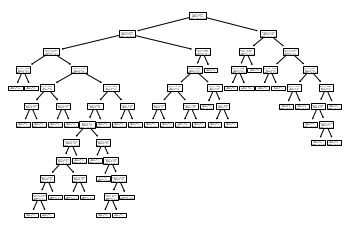

In [31]:
tree.plot_tree(clf)

In [32]:
clf.score(X_train_selected_ANOVA, y_train)

1.0

In [37]:
# Decisions Tree
fs = SelectKBest(score_func = f_classif, k = 19)
X_train_selected_ANOVA = fs.fit_transform(X_scaled, y_train)

%run dt.py

decision_tree_pred (X_train_selected_ANOVA, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


NameError: name 'KFold' is not defined

In [35]:
# Decisions Tree
fs = SelectKBest(score_func = f_classif, k = 10)
X_train_selected_ANOVA = fs.fit_transform(X_scaled, y_train)

#getting tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_selected_ANOVA, y_train)

clf.score(X_train_selected_ANOVA, y_train)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = tree.DecisionTreeClassifier()

# evaluate model
scores = cross_val_score(model, X_train_selected_ANOVA, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.523 (0.141)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [1 2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
